In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import sys
import math
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from pyentrp import entropy as pyent
import EntropyHub as EH
import neurokit2 as nk
import random
import sampen
import requests
import io
from pprint import pprint
import os
from sklearn import preprocessing
from influxdb_client import InfluxDBClient, Point
from influxdb_client.client.write_api import SYNCHRONOUS
from influxdb_client.client.flux_table import FluxTable
from datetime import datetime, timedelta
from typing import List
import itertools
from datetime import datetime
from datetime import timedelta
import itertools
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
np.std([1,1,1,1,1,1,1])

0.0

In [3]:
np.std([1,1,1,1,1,1,3])

0.6998542122237652

In [4]:
np.std([1,1,1,1,1,1,300])

104.62820472745288

In [5]:
np.std([1,1,1,1,1,1,-300])

105.32805893967665

In [15]:
np.array([300]) + np.ones(1) + np.array([300])

array([601.])

In [8]:
np.std([1,1,1,1,1,300,1,1,1,1,1,300])

111.43072087873952

In [16]:
np.std([-300,-150,0,150,300]*200)


212.13203435596427

In [8]:
nk.entropy_fuzzy([-300,1,300,1,-300,1,300,-300,1,300,-300,1,300]*1)

(1.0442600261477741,
 {'Dimension': 2, 'Delay': 1, 'Tolerance': 48.98989953460057})

In [14]:
nk.entropy_fuzzy([-300,-150,0,150,300]*400)


(0.43521509999396235,
 {'Dimension': 2, 'Delay': 1, 'Tolerance': 42.4370174520443})

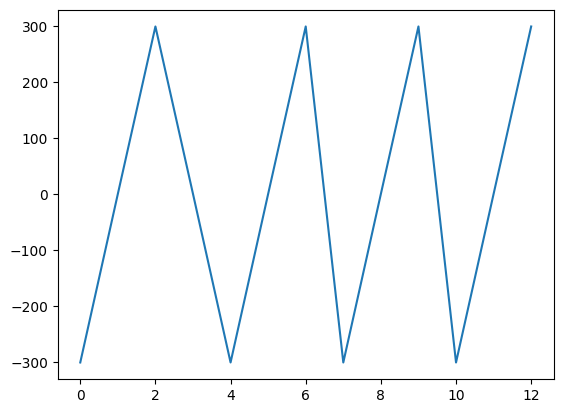

In [90]:
plt.plot([-300,1,300,1,-300,1,300,-300,1,300,-300,1,300])

In [65]:
def two_peek(length: int) -> List[int]:
    return [300] * (1001 - length) + [1] + [1] * length

In [78]:
a10 = two_peek(10)
a100 = two_peek(100)
a1000 = two_peek(900)

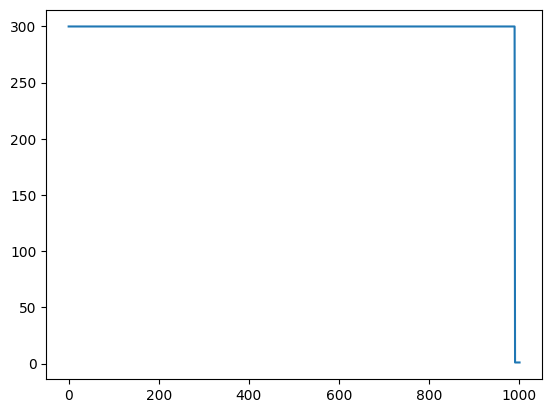

In [87]:
plt.plot(a10)

In [80]:
len(a10), len(a100), len(a1000)

(1002, 1002, 1002)

In [81]:
np.std(a10)

31.155637104887784

In [82]:
np.std(a100)

90.01741746279731

In [83]:
np.std(a1000)

90.01741746279731

In [84]:
nk.entropy_fuzzy(a10)

(0.0020040086867925697,
 {'Dimension': 2, 'Delay': 1, 'Tolerance': 6.234239095289345})

In [85]:
nk.entropy_fuzzy(a100)

(0.0020044440799283007,
 {'Dimension': 2, 'Delay': 1, 'Tolerance': 18.012473996736585})

In [86]:
nk.entropy_fuzzy(a1000)

(0.0020044440799281897,
 {'Dimension': 2, 'Delay': 1, 'Tolerance': 18.012473996736585})

In [74]:
nk.entropy_fuzzy(a1000)

(-0.0, {'Dimension': 2, 'Delay': 1, 'Tolerance': 1.8891538305836246})

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrum(s):
    f = np.fft.rfftfreq(len(s))
    return plt.loglog(f, np.abs(np.fft.rfft(s)))[0]

def noise_psd(N, psd = lambda f: 1):
    X_white = np.fft.rfft(np.random.randn(N));
    S = psd(np.fft.rfftfreq(N))
    # Normalize S
    S = S / np.sqrt(np.mean(S**2))
    X_shaped = X_white * S;
    return np.fft.irfft(X_shaped);

def PSDGenerator(f):
    return lambda N: noise_psd(N, f)

@PSDGenerator
def white_noise(f):
    return 1;

@PSDGenerator
def blue_noise(f):
    return np.sqrt(f);

@PSDGenerator
def violet_noise(f):
    return f;

@PSDGenerator
def brownian_noise(f):
    return 1/np.where(f == 0, float('inf'), f)

@PSDGenerator
def pink_noise(f):
    return 1/np.where(f == 0, float('inf'), np.sqrt(f))

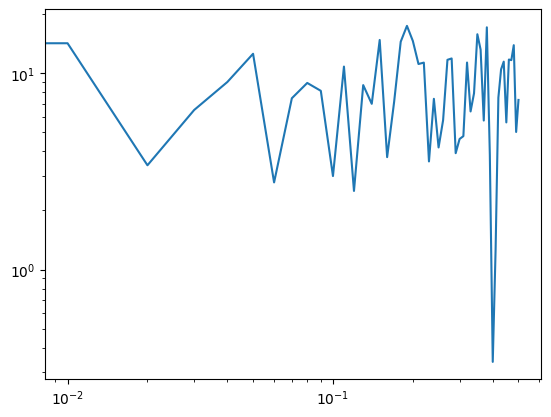

In [22]:
plot_spectrum(white_noise(100))

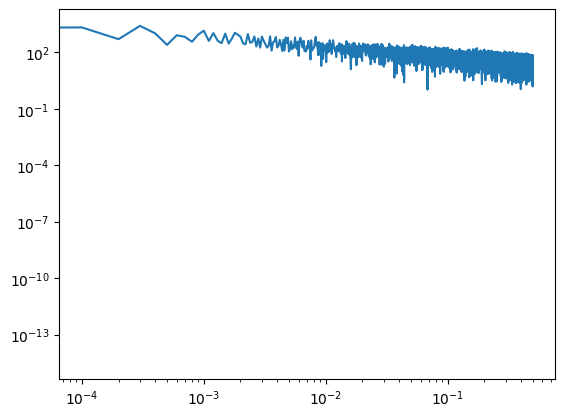

In [12]:
plot_spectrum(pink_noise(10000))

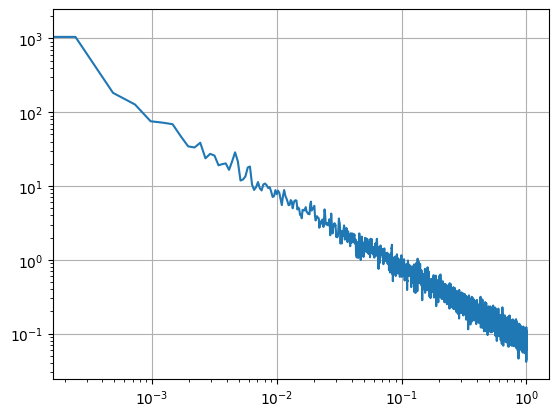

In [3]:
import colorednoise as cn
beta = 1 # the exponent
samples = 2**18 # number of samples to generate
y = cn.powerlaw_psd_gaussian(beta, samples)

# optionally plot the Power Spectral Density with Matplotlib
from matplotlib import mlab
from matplotlib import pylab as plt
s, f = mlab.psd(y, NFFT=2**13)
plt.loglog(f,s)
plt.grid(True)
plt.show()

In [7]:
SAMPLE_FREQ_HZ  = 125 * 1
SAMPLE_INTV_SEC = 1/SAMPLE_FREQ_HZ
def plot_test_points(sample_count: int = None):
    n = sample_count if sample_count else 1000
    fig, ax_list = plt.subplots(5, 1, figsize=(12, 8), tight_layout=True)
    i = 0
    for G, c, l in zip(
            [brownian_noise, pink_noise, white_noise, blue_noise, violet_noise],
            ['brown', 'hotpink', 'black', 'blue', 'violet'],
            ['brown', 'pink', 'white', 'blue', 'violet']):
        ax = ax_list[i]
        t = [x*SAMPLE_INTV_SEC for x in range(0, n)]
        ax.plot(t, G(n), color=c, linewidth=0.5, label=l)
        ax.legend(loc='lower left')
        ax.set_xlabel("Time [sec]")
        i += 1
    plt.suptitle(f"Colored Noise (n={n} points; sampling rate = {SAMPLE_FREQ_HZ}Hz)")
    plt.show()

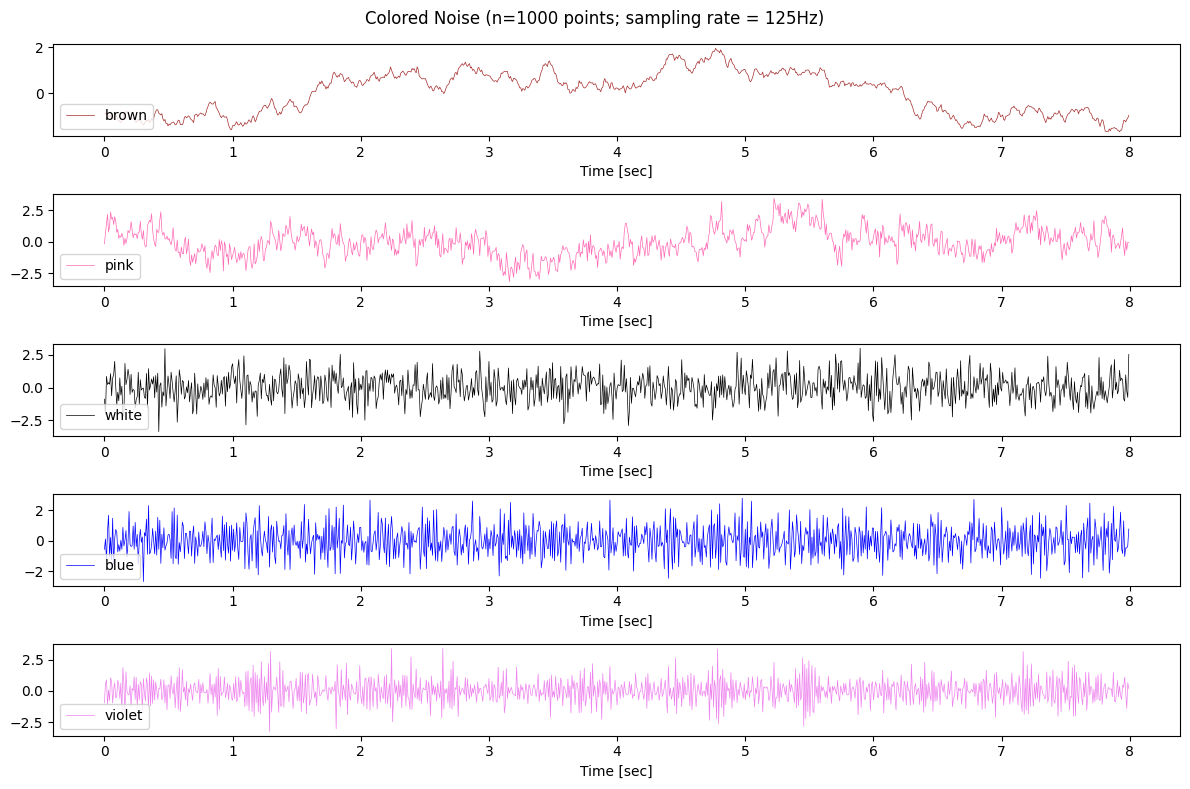

In [9]:
plot_test_points(1000)

In [1]:
import statsmodels.api as sm

/Users/nnao45/.ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/nnao45/.ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.8/site-packages/statsmodels/iolib/foreign.py:633: FutureWarning: In the future `np.long` will be defined as the corresponding NumPy scalar.  (This may have returned Python scalars in past versions.
  _type_converters = {253 : np.long, 252 : int}


AttributeError: module 'numpy' has no attribute 'long'